In this notebook, I will present one type of classifiers:
- $\textbf{Support Vector Machines (SVM) Classification}$

The data used in this notebook are the magnitudes in 5 different filters (ugriz) of 3 different objects:
stars, quasars, and white dwarfs.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams['legend.numpoints']=1
plt.rcParams['xtick.major.size'] = 11
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 11
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.visible']=True #See minor tick
plt.rcParams['text.usetex']=True #use Latex
plt.rcParams['axes.linewidth']=2 #width axes
plt.rcParams['axes.labelsize']=25 #
plt.rcParams['ytick.labelsize']=22 #fontsize of tick labels
plt.rcParams['xtick.labelsize']=22 #fontsize of tick labels
plt.rcParams['ytick.direction']='inout' ## direction: in, out, or inout
plt.rcParams['xtick.direction']='inout' ## direction: in, out, or inout

plt.rcParams['xtick.major.top']=True #draw x axis top major ticks
plt.rcParams['xtick.major.bottom']=True #draw x axis bottom major ticks
plt.rcParams['xtick.minor.top']=True ## draw x axis top minor ticks
plt.rcParams['xtick.minor.bottom']=True #draw x axis bottom minor ticks

plt.rcParams['ytick.major.left']=True #draw y axis left major ticks
plt.rcParams['ytick.major.right']=True #draw y axis right major ticks
plt.rcParams['ytick.minor.left']=True ## draw y axis left minor ticks
plt.rcParams['ytick.minor.right']=True #draw y axis right minor ticks


plt.rcParams['font.weight']='bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize']=22
plt.rcParams['figure.titlesize']=22

plt.rcParams['text.latex.preamble']=[r'\boldmath']

## 1) Import and look at the data

The labels are known and correspond to 1=star, 2=quasar, 3=white dwarf

In [3]:
df = pd.read_csv("Data/SDSS_all_classes_21.csv")
#Let's select only 20 000 objects 
df = df.sample (20000)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 69028 to 75850
Data columns (total 7 columns):
class      20000 non-null int64
u_mag      20000 non-null float64
g_mag      20000 non-null float64
r_mag      20000 non-null float64
i_mag      20000 non-null float64
z_mag      20000 non-null float64
max_mag    20000 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.2 MB
None


This data set from the Sky Digital Sloan Survey is composed by 83102 objects for which we have the class, the magnitudes in 5 filters (u,g,r,i,z) and the maximum magnitude. Our we select only 20 000 objects, for CPU reason.
The labels are known and correspond to 1=star, 2=quasar, 3=white dwarf. 

In [4]:
#Using pandas you can use describe to have a description of the data
df.describe()

,class,u_mag,g_mag,r_mag,i_mag,z_mag,max_mag
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.05260,19.369940,19.035410,18.883147,18.772407,18.713681,19.420520
std,0.41139,1.134336,1.177149,1.223585,1.242715,1.268702,1.119216
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,18.923000,18.633000,18.504000,18.405000,18.319000,18.971750
50%,2.00000,19.439000,19.166500,19.032000,18.928000,18.851500,19.474000
75%,2.00000,19.986000,19.658000,19.507000,19.393000,19.358000,20.046000
max,3.00000,21.000000,20.955000,20.874000,20.999000,20.997000,21.000000


In [5]:
u,g,r,i,z=df['u_mag'].values,df['g_mag'].values,df['r_mag'].values,df['i_mag'].values,df['z_mag'].values
target=df['class'].values
#Clean data by removing magnitude =0 
m_u,m_g,m_r,m_i,m_z=u[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],g[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],r[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],i[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)],z[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)]
target=target[(u!=0) & (g!=0) & (r!=0) & (i!=0) & (z!=0)] 

colours = np.array([m_u - m_g, m_g - m_r, m_r - m_i, m_i - m_z]).transpose()
names_colours = np.array(['(u-g)', '(g-r)', '(r-i)', '(i-z)'])
name_target=np.array([r'\textbf{Stars}', r'\textbf{Quasars}', r'\textbf{White Dwarfs}'])

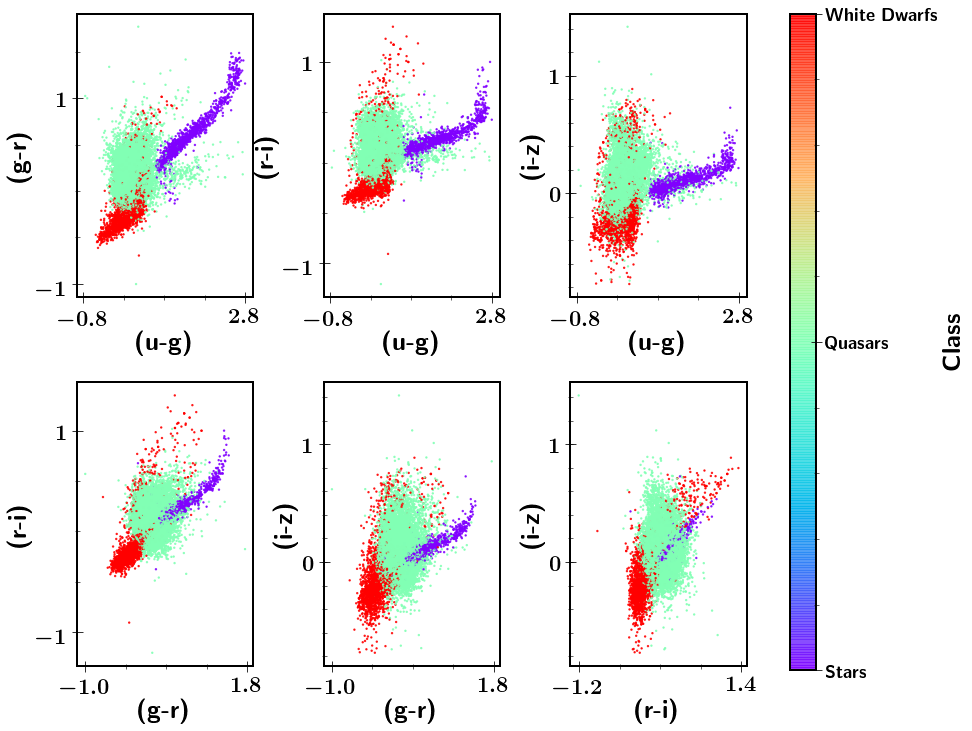

In [6]:
#Let's plot different colour-colour plots to see the data
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

for i, ax in enumerate(axes.flatten()):
    c=target
    s=2
    if i<3:
        x_plot=colours[:,0]
        y_plot=colours[:,i+1]
        sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
        ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
        ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
        ax.set_xlabel(r'\textbf{%s}'%names_colours[0])
        ax.set_ylabel(r'\textbf{%s}'%names_colours[i+1])

    elif (i==3) or (i==4):
        x_plot=colours[:,1]
        y_plot=colours[:,i-1]
        sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
        ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
        ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
        ax.set_xlabel(r'\textbf{%s}'%names_colours[1])
        ax.set_ylabel(r'\textbf{%s}'%names_colours[i-1])

    else:
        x_plot=colours[:,2]
        y_plot=colours[:,3]
        sc=ax.scatter(x_plot,y_plot,marker='o',alpha=0.8,c=c,s=s, cmap='rainbow')
        ax.set_yticks([int(min(y_plot)),int(max(y_plot))])
        ax.set_xticks([float("{:.1f}".format(min(x_plot))),float("{:.1f}".format(max(x_plot)))])
        ax.set_xlabel(r'\textbf{%s}'%names_colours[2])
        ax.set_ylabel(r'\textbf{%s}'%names_colours[3])


#Color bar
cax = plt.axes([0.95, 0.120, 0.03, 0.76])
clb = plt.colorbar(sc,cax=cax,ticks=[1,2,3])
clb.ax.set_ylabel(r'\textbf{Class}')
clb.ax.set_yticklabels(name_target)
clb.ax.tick_params(labelsize=18)

fig.subplots_adjust(hspace=0.3)   
fig.subplots_adjust(wspace=0.4)  

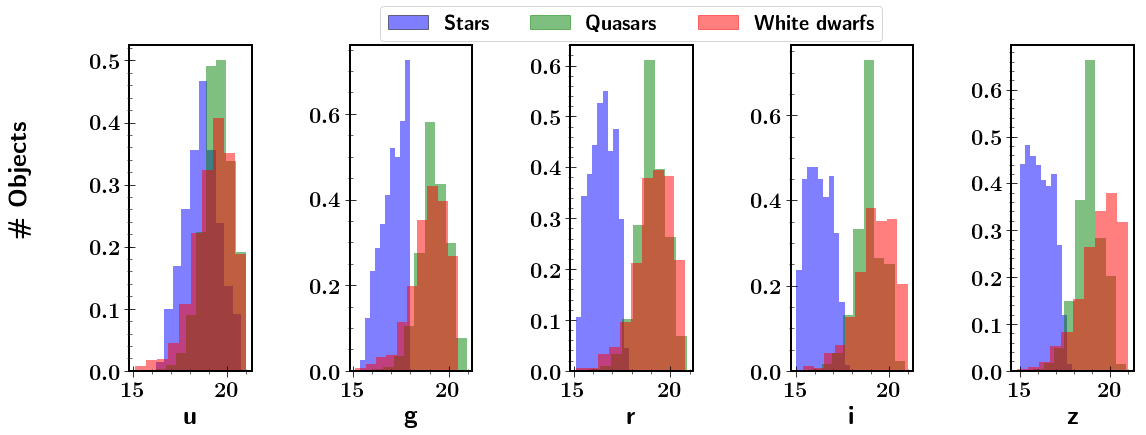

In [7]:
#Let's plot different the distribution of magnitudes
from matplotlib.patches import Rectangle
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 6))
mag_tot=m_u,m_g,m_r,m_i,m_z
filters=['u','g','r','i','z']
for i, ax in enumerate(axes.flatten()):
    ax.hist(mag_tot[i][target==1],alpha=0.5,color='blue',density=True)
    ax.hist(mag_tot[i][target==2],alpha=0.5,color='green',density=True)
    ax.hist(mag_tot[i][target==3],alpha=0.5,color='red',density=True)
    ax.set_xlabel(r'\textbf{%s}'%filters[i])
fig.subplots_adjust(wspace=0.8)
fig.add_subplot(111,frameon=False)
plt.tick_params(labelcolor='none',top=False,bottom=False,right=False,left=False)
plt.xticks([])
plt.yticks([])
fig.text(0.04, 0.57, r'\textbf{\# Objects}', va='center', ha='center', rotation='vertical',fontsize=25)

legend_elements = [Rectangle((0,0),1,1,color='b',alpha=0.5,ec='k', label=r'\textbf{Stars}'),Rectangle((0,0),1,1,color='g',alpha=0.5, label=r'\textbf{Quasars}'),Rectangle((0,0),1,1, color='r',alpha=0.5, label=r'\textbf{White dwarfs}')]
plt.legend(handles=legend_elements,loc=(0.25, 1.01), frameon=True,fancybox=True,markerscale=5,prop={'size':20},ncol=5)

## 2) Support Vector Machines classifier

Support Vector Machines (SVM) are supervised learning models used for classification and regression analysis.
The SVM algorithm is build to find a hyperplane in an N-dimensional space that distinctly separates/classifies the data points.
In the figure, we show an example of 2 groups of objects (red squares and blue circles). On the left, we see that a multiple of 2D hyperplanes exist.
The SVM algorithm will select the 2D hyperplane which maximizes the distance between data points of both classes, as shown on the right. Note that the distance is called the margin.  


For more complexe data (non linear separation), we can use Kernel to transform linearly inseparable data to linearly separable ones. The kernel function is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable.

(image from https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
![title](Data/SVM.png)


In [8]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(colours, target, test_size=0.2, random_state=1, stratify=None)
#‘random_state’ to 1 ensures that we get the same split each time so we can reproduce our results.
#Setting ‘stratify’ to None makes our training split represent the proportion of each value in the y variable.

#import the classifier
from sklearn.svm import SVC

# 2.1) Find the best parameters c and gamma

Different kernel:‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable

Here we use a Gaussian Kernel (rbf)

C= Regularization parameter and tells the SVM optimization  how much you want to avoid misclassifying each training sample.                     
Small C value -> a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Gamma=Kernel coefficient. For low gamma, points far away from plausible seperation line 
are considered in calculation for the seperation line.

In [9]:
#define the values to test
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

#variables to store the results
best_score = 0
best_param = {'C':None, 'gamma':None}

#grid search to find best parameters
for C in C_values:
    for gamma in gamma_values:
        svc = SVC(C=C, gamma=gamma)
        svc.fit(X_train,y_train)
        score = svc.score(X_test,y_test)

        if score > best_score:
            best_score = score
            best_param['C'] = C
            best_param['gamma'] = gamma

print('Best parameters:\nC = {0}\ngamma = {1}\nScore = {2:.3f}'.format(best_param['C'], best_param['gamma'], score))

Best parameters:
C = 3
gamma = 30
Score = 0.977


# 2.1) Create and test model


In [10]:
# Create SVM classifier with Gaussian Kernel
c_param=best_param['C']
gamma_param=best_param['gamma']
svmc=SVC( kernel='rbf',C=c_param, gamma=gamma_param, probability=True)

# Fit the classifier to the data
svmc.fit(X_train,y_train)
#Predict the test sample
y_pred_svm=svmc.predict(X_test)

In [11]:
# Let's look the first 10 predictions and real label:
print('Real label: %s' % y_test[0:10])
print('prediction: %s' % y_pred_svm[0:10])


Real label: [1 2 2 3 1 2 2 2 1 2]
prediction: [1 2 2 3 1 2 2 2 1 2]


In [12]:
#Let's look at the accuracy, score
from sklearn import metrics
print(f'Accuracy for SVM Classifier = {metrics.accuracy_score(y_test, y_pred_svm):.4f}')
print(f'Precision for SVM Classifier = %s'%np.around(metrics.precision_score(y_test, y_pred_svm, average=None),3))
print(f'Recall for SVM Classifier = %s'%np.around(metrics.recall_score(y_test, y_pred_svm, average=None),3))
print(f'F1-score for SVM Classifier = %s'%np.around(metrics.f1_score(y_test, y_pred_svm, average=None),3))


Accuracy for SVM Classifier = 0.9885
Precision for SVM Classifier = [ 0.984  0.991  0.97 ]
Recall for SVM Classifier = [ 0.98   0.995  0.951]
F1-score for SVM Classifier = [ 0.982  0.993  0.96 ]


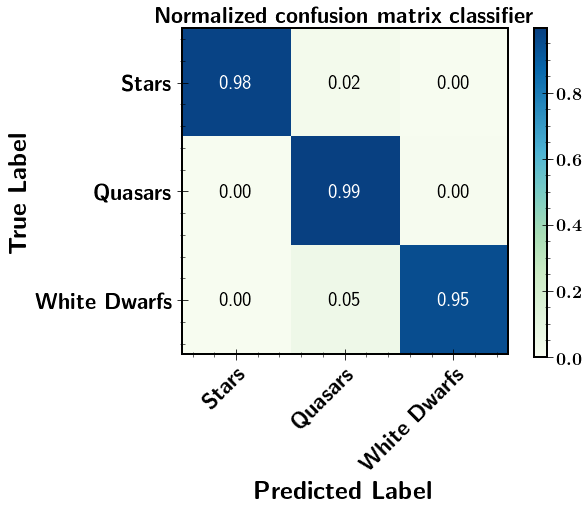

In [13]:
def conf_matrix(true, predict, classes, normalized=True, cl_names=None):
    '''
    function to plot confusion matrix
    '''
    cm = metrics.confusion_matrix(true, predict, labels=classes)
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title=r'\textbf{Normalized confusion matrix classifier}'
    else:
        title=r'\textbf{Confusion matrix classifier}'

    fig, ax = plt.subplots(figsize=(6,6), facecolor='w', edgecolor='k')
    im = ax.imshow(cm, interpolation='nearest', cmap="GnBu")
    
    #Color bar
    cax = plt.axes([0.95, 0.120, 0.03, 0.76])
    clb = fig.colorbar(im,cax=cax)
    clb.ax.tick_params(labelsize=18)
    
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),yticks=np.arange(cm.shape[0]),xticklabels=cl_names, 
           yticklabels=cl_names,xlabel=r'\textbf{Predicted Label}',ylabel=r'\textbf{True Label}',title=title)
        
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalized else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",size=20) 
    return ax

    
conf_matrix(y_test, y_pred_svm, [1,2,3], cl_names=name_target)

In [14]:
#Classification Probability (10 first)
prediction_prob=svmc.predict_proba(X_test)
prob_df = pd.DataFrame(prediction_prob, columns=['Stars','Quasars','White dwarfs'])
prob_df.head(10)


,Stars,Quasars,White dwarfs
0,9.962680e-01,0.003549,0.000183
1,8.481289e-04,0.999108,0.000044
2,9.960330e-04,0.994337,0.004667
3,5.761072e-04,0.003096,0.996328
4,9.995344e-01,0.000462,0.000004
5,1.313940e-03,0.983160,0.015526
6,4.045819e-07,0.999987,0.000013
7,3.653626e-04,0.978247,0.021388
8,9.930525e-01,0.006582,0.000366
9,1.048789e-03,0.987648,0.011303
